In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data= pd.read_csv('churn.csv')

In [4]:
data.head()

,Target Churn,Target Code,Current Bill Amt,Avg Calls,Avg Calls Weekdays,Account Age,Percent Increase MOM,Acct Plan Subtype,Complaint Code,Avg Days Delinquent,Current TechSupComplaints,Current Days OpenWorkOrders,Equipment Age,Condition of Current Handset,Avg Hours WorkOrderOpenned
0,No Churn,0,14210,17950.000000,30297.0000,24,-0.334193,Gold,Billing Problem,6.2,0,0.0,8,1.0,0.0
1,Churn,1,14407,0.000000,0.0000,28,0.000000,Silver,Moving,1.0,0,0.0,17,1.0,0.0
2,Churn,1,12712,204.666667,10393.6667,23,0.000000,Gold,Billing Problem,17.6,0,0.0,23,1.0,0.0
3,No Churn,0,13807,15490.333300,41256.3333,39,0.148986,Silver,Billing Problem,0.0,0,0.0,17,1.0,0.0
4,No Churn,0,3805,5075.000000,12333.3333,23,-0.686047,Gold,Billing Problem,3.8,0,0.0,10,1.0,0.0


In [5]:
data.tail()

,Target Churn,Target Code,Current Bill Amt,Avg Calls,Avg Calls Weekdays,Account Age,Percent Increase MOM,Acct Plan Subtype,Complaint Code,Avg Days Delinquent,Current TechSupComplaints,Current Days OpenWorkOrders,Equipment Age,Condition of Current Handset,Avg Hours WorkOrderOpenned
4703,Churn,1,11231,2424.00000,12282.3333,18,0.045455,Gold,Call Quality,18.0,4,0.0,0,NaN,30.0
4704,Churn,1,9237,8831.33333,20083.6667,24,-0.160437,Silver,Billing Problem,16.2,5,0.0,0,NaN,0.0
4705,No Churn,0,18384,3219.00000,25610.0000,23,-0.584683,Silver,Call Quality,10.5,5,0.0,0,NaN,27.2
4706,Churn,1,44133,34627.00000,83341.3333,38,-0.373016,Silver,Call Quality,31.7,6,0.0,0,NaN,59.0
4707,No Churn,0,18728,20507.33330,68844.0000,21,0.711737,Silver,Billing Problem,29.6,9,0.0,0,NaN,0.0


In [6]:
len(data)

4708

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4708 entries, 0 to 4707
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Target Churn                  4708 non-null   object 
 1   Target Code                   4708 non-null   int64  
 2   Current Bill Amt              4708 non-null   int64  
 3   Avg Calls                     4708 non-null   float64
 4   Avg Calls Weekdays            4708 non-null   float64
 5   Account Age                   4708 non-null   int64  
 6   Percent Increase MOM          4708 non-null   float64
 7   Acct Plan Subtype             4708 non-null   object 
 8   Complaint Code                4701 non-null   object 
 9   Avg Days Delinquent           4708 non-null   float64
 10  Current TechSupComplaints     4708 non-null   int64  
 11  Current Days OpenWorkOrders   4708 non-null   float64
 12  Equipment Age                 4708 non-null   int64  
 13  Con

In [28]:
data.dtypes

Target_Churn                     object
Target_Code                       int64
Current_Bill_Amt                  int64
Avg_Calls                       float64
Avg_Calls_Weekdays              float64
Account_Age                       int64
Percent_Increase_MOM            float64
Acct_Plan_Subtype                object
Complaint_Code                   object
Avg_Days_Delinquent             float64
Current_TechSupComplaints         int64
Current_Days_OpenWorkOrders     float64
Equipment_Age                     int64
Condition_of_Current_Handset     object
Avg_Hours_WorkOrderOpenned      float64
dtype: object

In [49]:
data.nunique()

Target_Churn                       2
Target_Code                        2
Current_Bill_Amt                3478
Avg_Calls                       4385
Avg_Calls_Weekdays              4560
Account_Age                       26
Percent_Increase_MOM            3904
Acct_Plan_Subtype                  2
Complaint_Code                     6
Avg_Days_Delinquent              393
Current_TechSupComplaints         11
Current_Days_OpenWorkOrders       96
Equipment_Age                     40
Condition_of_Current_Handset       3
Avg_Hours_WorkOrderOpenned        91
dtype: int64

In [8]:
data.shape

(4708, 15)

In [12]:
data.columns=data.columns.str.replace(' ','_')

In [16]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Target_Code,4708.0,0.485769,0.499851,0.0,0.000000,0.00000,1.000000,1.000
Current_Bill_Amt,4708.0,19828.815845,17204.510108,-690.0,12288.000000,15254.00000,22799.000000,325127.000
Avg_Calls,4708.0,9269.690314,10437.339850,0.0,2602.250002,6396.33333,12250.499975,181786.000
Avg_Calls_Weekdays,4708.0,38127.994973,39172.244943,0.0,13031.250025,26765.83335,50061.416675,374457.667
Account_Age,4708.0,26.079652,7.149933,15.0,20.000000,25.00000,32.000000,40.000
Percent_Increase_MOM,4708.0,-0.005127,4.481852,-1.0,-0.574084,-0.18528,0.121823,210.100
Avg_Days_Delinquent,4708.0,13.968564,10.789062,0.0,6.000000,12.40000,19.300000,126.000
Current_TechSupComplaints,4708.0,0.414826,0.954549,0.0,0.000000,0.00000,0.000000,11.000
Current_Days_OpenWorkOrders,4708.0,2.438828,20.197292,0.0,0.000000,0.00000,0.000000,368.000
Equipment_Age,4708.0,10.811810,8.710548,0.0,4.000000,9.00000,17.000000,39.000


In [17]:
data.describe(include='object').T

,count,unique,top,freq
Target_Churn,4708,2,No Churn,2421
Acct_Plan_Subtype,4708,2,Silver,3914
Complaint_Code,4701,6,Billing Problem,2908


In [17]:
data['Target_Code']=data.Target_Code.astype('object')
data['Condition_of_Current_Handset']=data.Condition_of_Current_Handset.astype('object')
data['Current_TechSupComplaints']=data.Current_TechSupComplaints.astype('object')
data['Target_Code']=data.Target_Code.astype('int64')

In [29]:
data.describe(include='object').T

,count,unique,top,freq
Target_Churn,4708,2,No Churn,2421
Acct_Plan_Subtype,4708,2,Silver,3914
Complaint_Code,4708,6,Billing Problem,2915
Condition_of_Current_Handset,4708,3,1,4630


In [9]:
data.isnull().sum()

Target Churn                      0
Target Code                       0
Current Bill Amt                  0
Avg Calls                         0
Avg Calls Weekdays                0
Account Age                       0
Percent Increase MOM              0
Acct Plan Subtype                 0
Complaint Code                    7
Avg Days Delinquent               0
Current TechSupComplaints         0
Current Days OpenWorkOrders       0
Equipment Age                     0
Condition of Current Handset    444
Avg Hours WorkOrderOpenned        0
dtype: int64

In [18]:
round(data.isnull().sum()/len(data)*100,2)

Target_Churn                    0.00
Target_Code                     0.00
Current_Bill_Amt                0.00
Avg_Calls                       0.00
Avg_Calls_Weekdays              0.00
Account_Age                     0.00
Percent_Increase_MOM            0.00
Acct_Plan_Subtype               0.00
Complaint_Code                  0.15
Avg_Days_Delinquent             0.00
Current_TechSupComplaints       0.00
Current_Days_OpenWorkOrders     0.00
Equipment_Age                   0.00
Condition_of_Current_Handset    9.43
Avg_Hours_WorkOrderOpenned      0.00
dtype: float64

In [19]:
data.Complaint_Code.value_counts()

Billing Problem         2908
Call Quality            1070
Moving                   511
Check Account            195
Inaccurate Sales Inf      13
Pricing                    4
Name: Complaint_Code, dtype: int64

In [23]:
data.Condition_of_Current_Handset.value_counts()

1.0    4186
2.0      74
3.0       4
Name: Condition_of_Current_Handset, dtype: int64

In [35]:
data.Complaint_Code=data.Complaint_Code.fillna(value='Billing Problem')
data.Condition_of_Current_Handset=data.Condition_of_Current_Handset.fillna(value=1)
data.Condition_of_Current_Handset=data.Condition_of_Current_Handset.astype('object')

In [36]:
data.Target_Churn.value_counts()

No Churn    2421
Churn       2287
Name: Target_Churn, dtype: int64

In [37]:
data.Target_Churn.value_counts(1)*100

No Churn    51.42311
Churn       48.57689
Name: Target_Churn, dtype: float64

In [38]:
summary_churn = data.groupby('Target_Churn')
summary_churn.mean().T

Target_Churn,Churn,No Churn
Target_Code,1.000000,0.000000
Current_Bill_Amt,20182.709226,19494.510120
Avg_Calls,9348.878298,9194.885309
Avg_Calls_Weekdays,37524.030899,38698.530221
Account_Age,25.418452,26.704254
Percent_Increase_MOM,-0.281309,0.255769
Avg_Days_Delinquent,19.075339,9.144444
Current_TechSupComplaints,0.459117,0.372986
Current_Days_OpenWorkOrders,2.498907,2.382074
Equipment_Age,11.191517,10.453119


In [45]:
round(data.corr(),3)

,Target_Code,Current_Bill_Amt,Avg_Calls,Avg_Calls_Weekdays,Account_Age,Percent_Increase_MOM,Avg_Days_Delinquent,Current_TechSupComplaints,Current_Days_OpenWorkOrders,Equipment_Age,Avg_Hours_WorkOrderOpenned
Target_Code,1.000,0.020,0.007,-0.015,-0.090,-0.060,0.460,0.045,0.003,0.042,0.003
Current_Bill_Amt,0.020,1.000,0.353,0.428,0.003,-0.016,0.024,0.077,0.076,-0.041,0.017
Avg_Calls,0.007,0.353,1.000,0.727,-0.024,-0.041,0.019,0.091,0.078,-0.099,0.013
Avg_Calls_Weekdays,-0.015,0.428,0.727,1.000,0.030,-0.044,0.017,0.114,0.065,-0.104,0.014
Account_Age,-0.090,0.003,-0.024,0.030,1.000,-0.004,-0.048,-0.020,-0.026,0.074,0.005
Percent_Increase_MOM,-0.060,-0.016,-0.041,-0.044,-0.004,1.000,0.050,0.015,-0.003,-0.004,-0.009
Avg_Days_Delinquent,0.460,0.024,0.019,0.017,-0.048,0.050,1.000,0.077,-0.002,0.014,0.000
Current_TechSupComplaints,0.045,0.077,0.091,0.114,-0.020,0.015,0.077,1.000,0.025,-0.056,0.227
Current_Days_OpenWorkOrders,0.003,0.076,0.078,0.065,-0.026,-0.003,-0.002,0.025,1.000,-0.038,0.029
Equipment_Age,0.042,-0.041,-0.099,-0.104,0.074,-0.004,0.014,-0.056,-0.038,1.000,-0.014


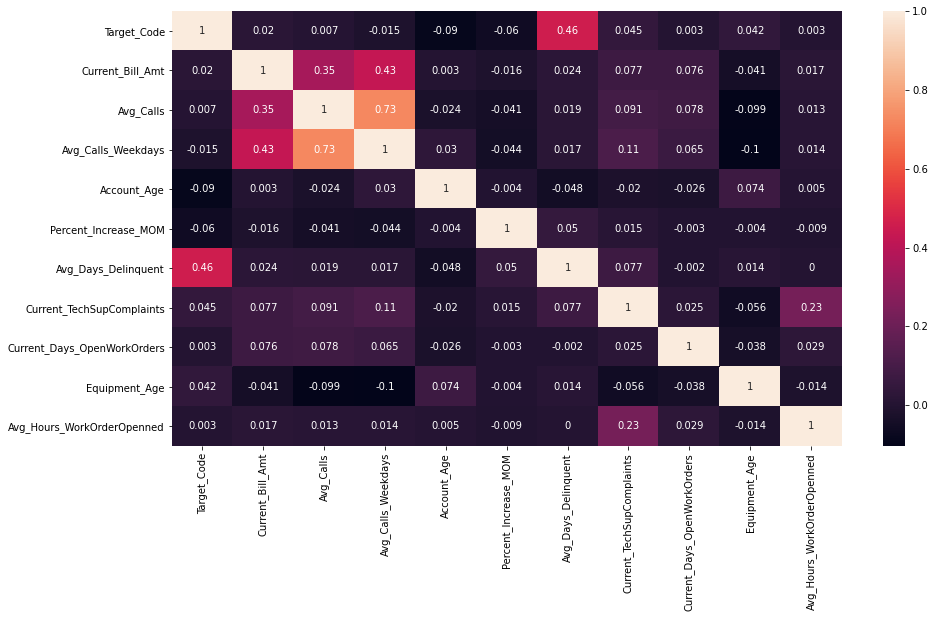

In [50]:
corr = round(data.corr(),3)
plt.figure(figsize=(15,8))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,annot=True);

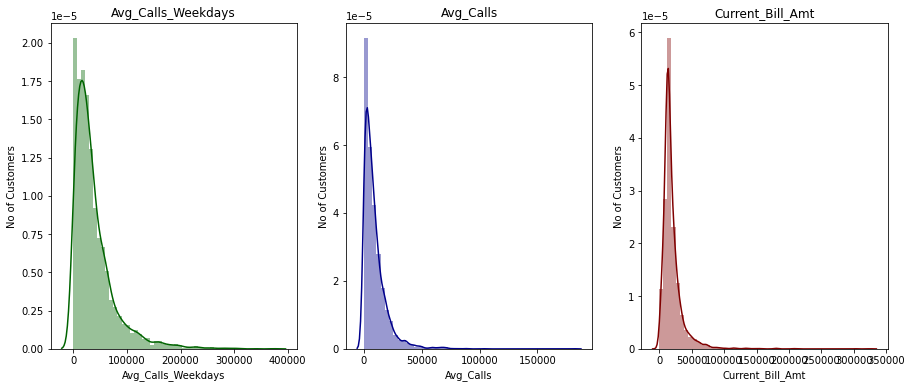

In [52]:
f, axes = plt.subplots(ncols=3, figsize=(15, 6))

sns.distplot(data.Avg_Calls_Weekdays, kde=True,  color="darkgreen", ax=axes[0]).set_title('Avg_Calls_Weekdays')
axes[0].set_ylabel('No of Customers')


sns.distplot(data.Avg_Calls, kde=True,color="darkblue", ax=axes[1]).set_title('Avg_Calls')
axes[1].set_ylabel('No of Customers')


sns.distplot(data.Current_Bill_Amt, kde=True, color="maroon", ax=axes[2]).set_title('Current_Bill_Amt')
axes[2].set_ylabel('No of Customers');

In [47]:
data.Target_Churn.value_counts()

No Churn    2421
Churn       2287
Name: Target_Churn, dtype: int64

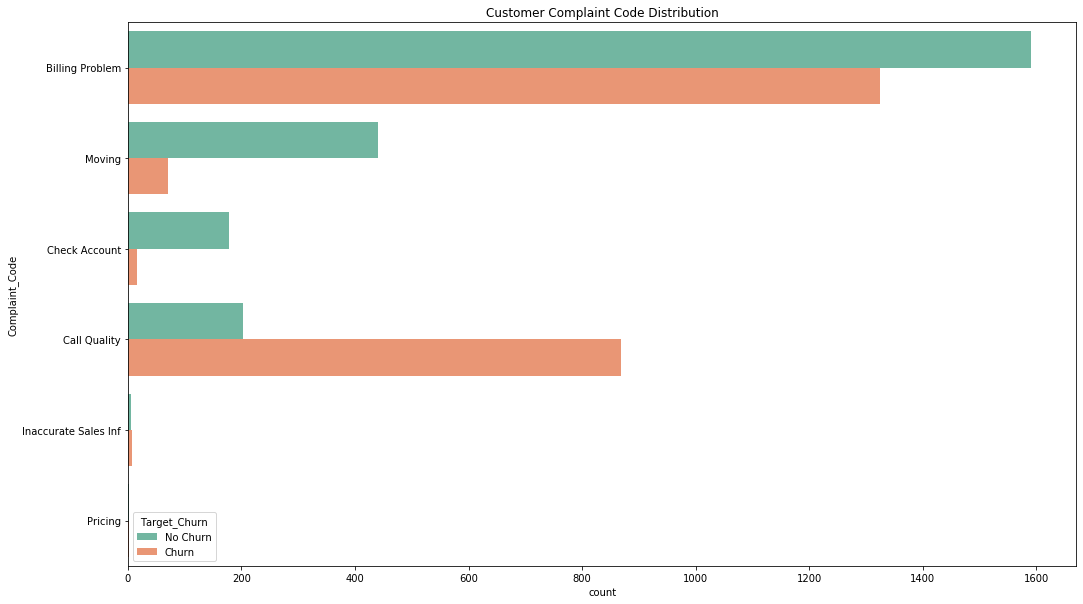

In [32]:
plt.figure(figsize=(17,10))
p=sns.countplot(y="Complaint_Code", hue='Target_Churn', data=data,palette="Set2")
legend = p.get_legend()
legend_txt = legend.texts
legend_txt[0].set_text("No Churn")
legend_txt[1].set_text("Churn")
p.set_title('Customer Complaint Code Distribution');

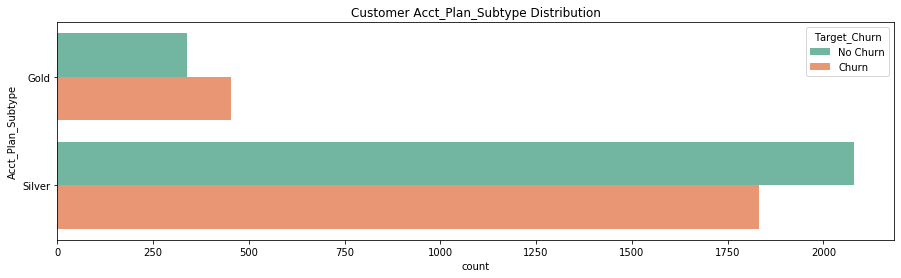

In [33]:
plt.figure(figsize=(15,4))
p=sns.countplot(y="Acct_Plan_Subtype", hue='Target_Churn', data=data,palette="Set2")
legend = p.get_legend()
legend_txt = legend.texts
legend_txt[0].set_text("No Churn")
legend_txt[1].set_text("Churn")
p.set_title('Customer Acct_Plan_Subtype Distribution');

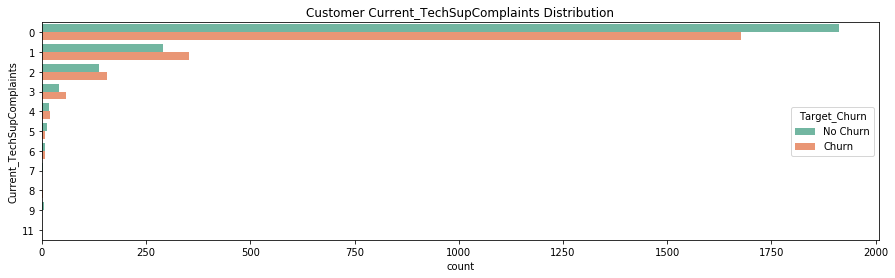

In [34]:
plt.figure(figsize=(15,4))
p=sns.countplot(y="Current_TechSupComplaints", hue='Target_Churn', data=data,palette="Set2")
legend = p.get_legend()
legend_txt = legend.texts
legend_txt[0].set_text("No Churn")
legend_txt[1].set_text("Churn")
p.set_title('Customer Current_TechSupComplaints Distribution');

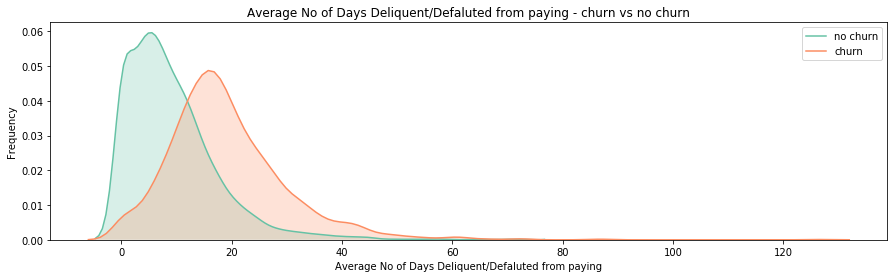

In [35]:
plt.figure(figsize=(15,4))
ax=sns.kdeplot(data.loc[(data['Target_Code'] == 0),'Avg_Days_Delinquent'] , color=sns.color_palette("Set2")[0],shade=True,label='no churn')
ax=sns.kdeplot(data.loc[(data['Target_Code'] == 1),'Avg_Days_Delinquent'] , color=sns.color_palette("Set2")[1],shade=True, label='churn')
ax.set(xlabel='Average No of Days Deliquent/Defaluted from paying', ylabel='Frequency')
plt.title('Average No of Days Deliquent/Defaluted from paying - churn vs no churn');

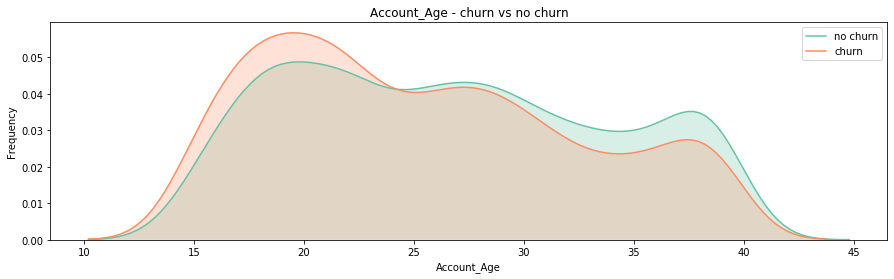

In [36]:
plt.figure(figsize=(15,4))
ax=sns.kdeplot(data.loc[(data['Target_Code'] == 0),'Account_Age'] , color=sns.color_palette("Set2")[0],shade=True,label='no churn')
ax=sns.kdeplot(data.loc[(data['Target_Code'] == 1),'Account_Age'] , color=sns.color_palette("Set2")[1],shade=True, label='churn')
ax.set(xlabel='Account_Age', ylabel='Frequency')
plt.title('Account_Age - churn vs no churn');

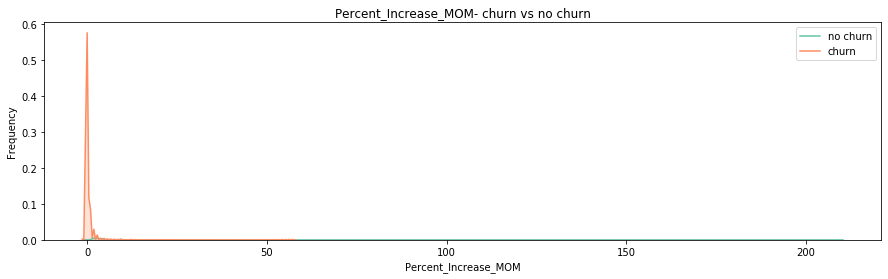

In [37]:
plt.figure(figsize=(15,4))
ax=sns.kdeplot(data.loc[(data['Target_Code'] == 0),'Percent_Increase_MOM'] , color=sns.color_palette("Set2")[0],shade=True,label='no churn')
ax=sns.kdeplot(data.loc[(data['Target_Code'] == 1),'Percent_Increase_MOM'] , color=sns.color_palette("Set2")[1],shade=True, label='churn')
ax.set(xlabel='Percent_Increase_MOM', ylabel='Frequency')
plt.title('Percent_Increase_MOM- churn vs no churn');

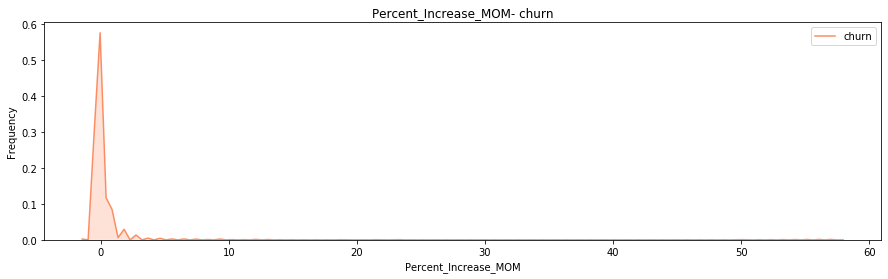

In [38]:
plt.figure(figsize=(15,4))
ax=sns.kdeplot(data.loc[(data['Target_Code'] == 1),'Percent_Increase_MOM'] ,color=sns.color_palette("Set2")[1],shade=True, label='churn')
ax.set(xlabel='Percent_Increase_MOM', ylabel='Frequency')
plt.title('Percent_Increase_MOM- churn');

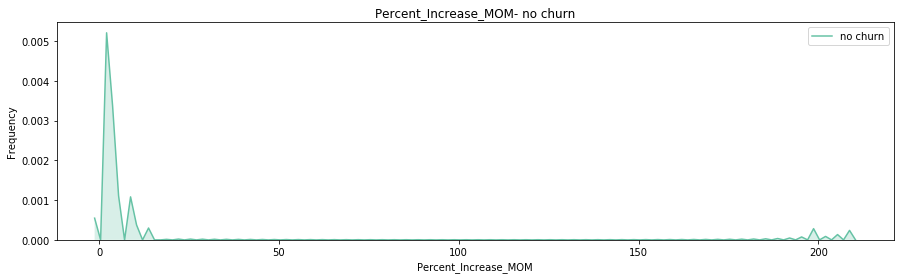

In [39]:
plt.figure(figsize=(15,4))
ax=sns.kdeplot(data.loc[(data['Target_Code'] == 0),'Percent_Increase_MOM'] ,color=sns.color_palette("Set2")[0],shade=True, label='no churn')
ax.set(xlabel='Percent_Increase_MOM', ylabel='Frequency')
plt.title('Percent_Increase_MOM- no churn');

## Variable selection  with Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [43]:
data["Acct_Plan_Subtype"].value_counts()

Silver    3914
Gold       794
Name: Acct_Plan_Subtype, dtype: int64

In [45]:
data["Complaint_Code"].value_counts()

Billing Problem         2915
Call Quality            1070
Moving                   511
Check Account            195
Inaccurate Sales Inf      13
Pricing                    4
Name: Complaint_Code, dtype: int64

In [46]:
data.Acct_Plan_Subtype = data.Acct_Plan_Subtype.astype('category').cat.codes
data.Complaint_Code = data.Complaint_Code.astype('category').cat.codes

In [47]:
data.Acct_Plan_Subtype.value_counts()

1    3914
0     794
Name: Acct_Plan_Subtype, dtype: int64

In [48]:
data.Complaint_Code.value_counts()

0    2915
1    1070
4     511
2     195
3      13
5       4
Name: Complaint_Code, dtype: int64

In [49]:
data[["Acct_Plan_Subtype","Complaint_Code"]].head()

,Acct_Plan_Subtype,Complaint_Code
0,0,0
1,1,4
2,0,0
3,1,0
4,0,0


In [50]:
data[['Target_Code', 'Target_Churn']].head(10)

,Target_Code,Target_Churn
0,0,No Churn
1,1,Churn
2,1,Churn
3,0,No Churn
4,0,No Churn
5,1,Churn
6,0,No Churn
7,1,Churn
8,0,No Churn
9,1,Churn


In [51]:
target = 'Target_Code'
X = data.drop(['Target_Code','Target_Churn'], axis=1)
y=data[target]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=y)

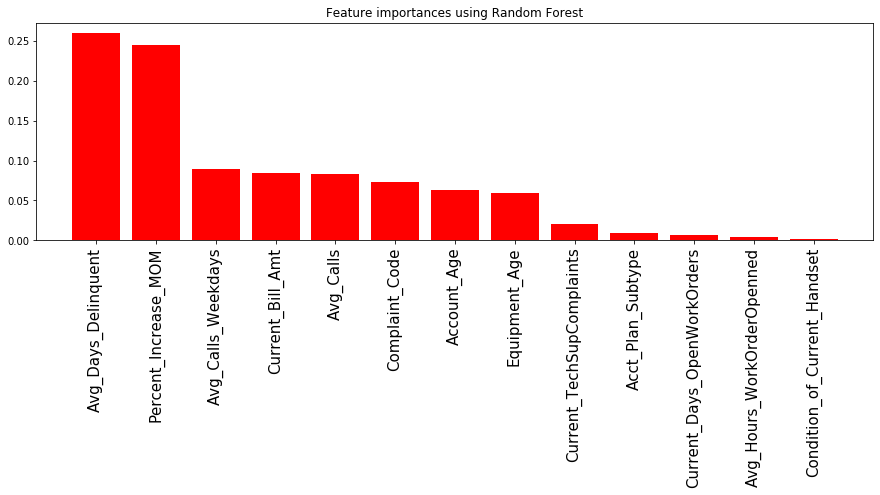

In [52]:
forest=RandomForestClassifier(n_estimators=500,random_state=1)

forest.fit(X_train,y_train)

importances=forest.feature_importances_
features = data.drop(['Target_Code','Target_Churn'],axis=1).columns

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(15,4))
plt.title("Feature importances using Random Forest")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r",  align="center")
plt.xticks(range(X_train.shape[1]), features[indices], rotation='vertical',fontsize=15)
plt.xlim([-1, X_train.shape[1]])
plt.show()

## Logistic Regression

In [53]:
import statsmodels.api as sm
top7_features = ['Avg_Days_Delinquent','Percent_Increase_MOM','Avg_Calls_Weekdays','Current_Bill_Amt','Avg_Calls','Complaint_Code','Account_Age']
logReg = sm.Logit(y_train, X_train[top7_features])
logistic_regression = logReg.fit()

Optimization terminated successfully.
         Current function value: 0.551146
         Iterations 8


In [54]:
logistic_regression.summary
logistic_regression.params

Avg_Days_Delinquent     1.109226e-01
Percent_Increase_MOM   -3.922044e-01
Avg_Calls_Weekdays     -3.315366e-06
Current_Bill_Amt       -2.385475e-07
Avg_Calls              -1.817086e-06
Complaint_Code         -2.083688e-01
Account_Age            -4.794911e-02
dtype: float64

In [55]:
coef = logistic_regression.params
def y (coef, Avg_Days_Delinquent,Percent_Increase_MOM,Avg_Calls_Weekdays,Current_Bill_Amt,Avg_Calls,Complaint_Code,Account_Age) : 
    final_coef=coef[0]*Avg_Days_Delinquent+ coef[1]*Percent_Increase_MOM+coef[2]*Avg_Calls_Weekdays+coef[3]*Current_Bill_Amt+ coef[4]*Avg_Calls+coef[5]*Complaint_Code+coef[6]*Account_Age
    return final_coef

In [57]:
# A employee with the following variables 
# Avg_Days_Delinquent    40
# Percent_Increase_MOM   5
# Avg_Calls_Weekdays     39000
# Current_Bill_Amt       12000
# Avg_Calls              9000
# Complaint_Code         0
# Account_Age            17
# Have 82% of loosing probability

y1 = y(coef, 40, 5, 39000,12000,9000,0,17)
p = np.exp(y1) / (1+np.exp(y1))
p

0.8193916658925811

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
clf_logistic = LogisticRegression(random_state=0, solver='lbfgs').fit(X_train[top7_features], y_train)

In [60]:
clf_logistic 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [61]:
clf_logistic.score(X_test[top7_features], y_test)

0.7454031117397454

## SVM

In [62]:
from sklearn import svm

In [63]:
clf_svm=svm.SVC(kernel='linear', C=1)

In [64]:
clf_svm

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [ ]:
clf_svm.fit(X_train[top7_features],y_train)

In [67]:
clf_svm.score(X_test[top7_features], y_test)

0.7652050919377652

## Desicion trees

In [68]:
from sklearn import tree

In [69]:
clf_decision = tree.DecisionTreeClassifier()

In [70]:
clf_decision

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [71]:
clf_decision.fit(X_train[top7_features],y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [72]:
clf_decision.score(X_test[top7_features], y_test)

0.7609618104667609

## Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
clf_random = RandomForestClassifier(n_estimators=20, max_depth=None,
     min_samples_split=7, random_state=0)

In [75]:
clf_random.fit(X_train[top7_features], y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=7,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [76]:
clf_random.score(X_test[top7_features], y_test)

0.8104667609618105

## Random Forest with standarization

In [77]:
# Avg_Days_Delinquent    
# Percent_Increase_MOM   
# Avg_Calls_Weekdays     
# Current_Bill_Amt       
# Avg_Calls              
# Complaint_Code         
# Account_Age

In [78]:
from sklearn import preprocessing

In [81]:
top5_features=['Avg_Calls_Weekdays', 'Current_Bill_Amt', 'Avg_Calls', 'Account_Age','Avg_Days_Delinquent']

In [82]:
top2_features=['Percent_Increase_MOM','Complaint_Code']

In [83]:
scaler = preprocessing.StandardScaler().fit(X_train[top5_features])

In [84]:
X_train_scalar=pd.DataFrame(scaler.transform(X_train[top5_features]),columns = X_train[top5_features].columns)

In [85]:
X_train_scalar_combined=pd.concat([X_train_scalar,  X_train[top2_features].reset_index(drop=True)], axis=1, sort=False)

In [86]:
X_test_scalar=pd.DataFrame(scaler.transform(X_test[top5_features]),columns = X_test[top5_features].columns)

In [87]:
X_test_scalar_combined=pd.concat([X_test_scalar,  X_test[top2_features].reset_index(drop=True)], axis=1, sort=False)

In [88]:
clf_random.fit(X_train_scalar_combined, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=7,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [89]:
clf_random.score(X_test_scalar_combined, y_test)

0.8118811881188119

## Grid Search

In [90]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [91]:
parameters = [ {'min_samples_split': [4,5,7,9,10], 'n_estimators':[10,20,30,40,50,100,150,160,200,250,300],'max_depth': [2,5,7,10]}]

In [92]:
clf_random_grid = GridSearchCV(RandomForestClassifier(), parameters, cv = StratifiedKFold(n_splits = 10))
clf_random_grid.fit(X_train_scalar_combined, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'min_samples_split': [4, 5, 7, 9, 10], 'n_estimators': [10, 20, 30, 40, 50, 100, 150, 160, 200, 250, 300], 'max_depth': [2, 5, 7, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [93]:
print('best score train:', clf_random_grid.best_score_)
print('best parameters train: ', clf_random_grid.best_params_)

best score train: 0.8027993001749563
best parameters train:  {'max_depth': 7, 'min_samples_split': 5, 'n_estimators': 150}


In [94]:
clf_random_grid.score(X_test_scalar_combined, y_test)

0.8246110325318247

## Performance metrics

In [95]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn import metrics

In [96]:
clf_random_grid = RandomForestClassifier(n_estimators=100, max_depth=7,
     min_samples_split=10, random_state=0)

In [97]:
clf_random_grid.fit(X_train_scalar_combined, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [98]:
y_pred=clf_random_grid.predict(X_test_scalar_combined)

In [99]:
target_names = ['No Churn', 'Churn']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    No Churn       0.85      0.80      0.82       364
       Churn       0.80      0.85      0.82       343

   micro avg       0.82      0.82      0.82       707
   macro avg       0.82      0.82      0.82       707
weighted avg       0.82      0.82      0.82       707



In [100]:
cm = confusion_matrix(y_test, y_pred) 

cm_df = pd.DataFrame(cm,
                     index = ['No Churn','Churn'], 
                     columns = ['No Churn','Churn'])

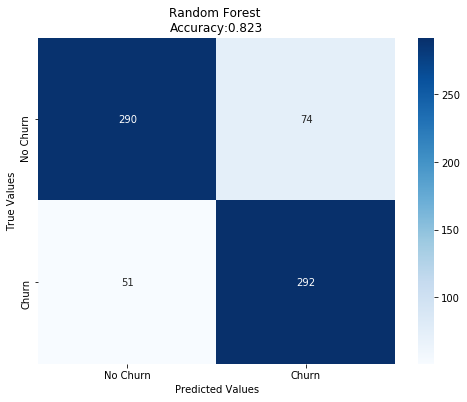

In [101]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt='g',cmap='Blues')
plt.title('Random Forest \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

In [102]:
from sklearn.metrics import roc_curve,auc

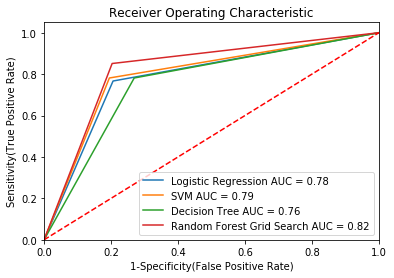

In [103]:
models = [
{
    'label': 'Logistic Regression',
    'model': clf_logistic,
},
{
    'label': 'SVM',
    'model': clf_svm,
},
{
    'label': 'Decision Tree',
    'model': clf_decision,
},
{
    'label': 'Random Forest Grid Search',
    'model': clf_random_grid,
}
]


for m in models:
    model = m['model'] 
    model.fit(X_train_scalar_combined, y_train) 
    y_pred=model.predict(X_test_scalar_combined) 
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s AUC = %0.2f' % (m['label'], roc_auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('Sensitivity(True Positive Rate)')
plt.xlabel('1-Specificity(False Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()